Simple implementation of a least-squares solution to linear regression that applies an iterative update to adjust the weights.

In [1]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

Equation is: y = 1121.365265 + 137.389315x


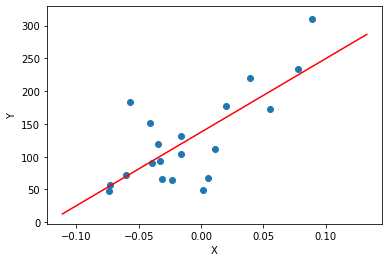

In [2]:
#We are looking for y = d + w0x where w0 is or minimized wieght.
diabetes_X_mean = np.mean(diabetes_X_test)
diabetes_y_mean = np.mean(diabetes_y_test)

#Now we wanna calculate the numerator and denominator of the Linear Regression weight formula
num = 0
den = 0

#Length of data
l = len(diabetes_y_test)

#Calculating the numerator and denominator 
for i in range(l):
    num += (diabetes_X_test[i] - diabetes_X_mean) * (diabetes_y_test[i] - diabetes_y_mean)
    den += (diabetes_X_test[i] - diabetes_X_mean) ** 2
w = num / den
d = diabetes_y_mean - (w * diabetes_X_mean)

#Lets print our equation 
print("Equation is: y = %f + %fx" %(w,d))

#Getting maximum and minimum of dataset - we add 50% of each to themselves for better view in our plot
max_x = np.max(diabetes_X_test) + np.max(diabetes_X_test)*0.5
min_x = np.min(diabetes_X_test) + np.min(diabetes_X_test)*0.5

#Using linspace to create the line
x = np.linspace(min_x, max_x, 1000)
y = d + w * x

#Plotting the linear regeerssion line.
plt.plot(x, y, color='red', label='line')

#Plotting scatter plot
plt.scatter(diabetes_X_test, diabetes_y_test)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Using Linear regression and other models to predict revenue of movies.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from ast import literal_eval
meta_data=pd.read_csv('movies_metadata.csv', low_memory=False) # You may wish to specify types, or process columns once read
ratings_small=pd.read_csv('ratings_small.csv')
import warnings; warnings.simplefilter('ignore')
#Set the proper data type for relative data.
meta_data['popularity'] = pd.to_numeric(meta_data['popularity'],errors='coerce')
meta_data['budget'] = pd.to_numeric(meta_data['budget'],errors='coerce')
meta_data['runtime'] = pd.to_numeric(meta_data['runtime'],errors='coerce')

In [2]:
meta_data.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [3]:
meta_data.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
#Set train data and delete irrelevant columns
train = meta_data
train_id = train['id']
train_imdb_id = train['imdb_id']
train_revenue = train['revenue']
train_status = train['status']
del train['id']
del train['imdb_id']
del train['adult']
del train['status']

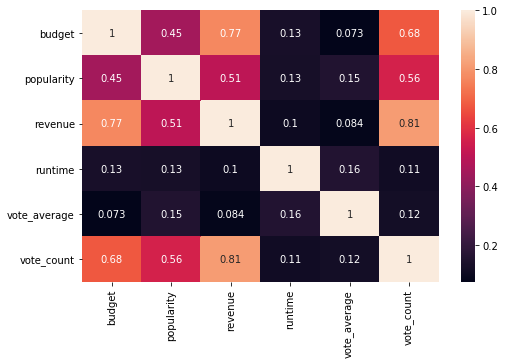

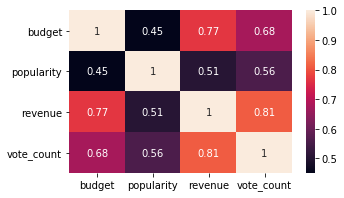

,Most correlated features
0,budget
1,popularity
2,revenue
3,vote_count


In [5]:
#Only select data that are numbers
data_num = meta_data.select_dtypes(include=[np.number])

#Find correlation between data and plotting heatmap
corr = data_num.corr()
plt.subplots(figsize=(8,5))
sns.heatmap(corr, annot=True)

#Second heatmap showing top 50% of correlative data
top_feature = corr.index[abs(corr['revenue']>0.5)]
plt.subplots(figsize=(5, 3))
top_corr = meta_data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

most_corr = pd.DataFrame(top_feature)
most_corr.columns = ['Most correlated features']
most_corr

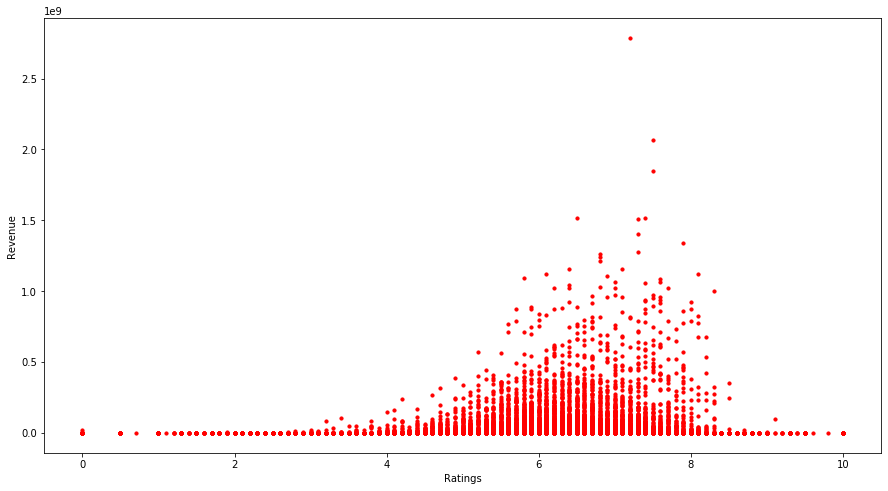

In [6]:
#Scatter plot of ratings(Vote Average) vs revenue
plt.figure(figsize=(15, 8))
plt.scatter(meta_data['vote_average'], meta_data['revenue'], c='red', s=10)
plt.xlabel('Ratings')
plt.ylabel('Revenue')
plt.show()

Features are information about different movies such as release date, production company and etc. Above code shows the head of data and how they are represented

we can see the movie ratings are in the range of 0 to 10 however before 0.5 rating the numbers of movies are insignificant therefore we can argue that it is an outlier and remove it in further steps. We can also abserve that most of our ratings are in the range 6-8

Based on the heat map of the top correlative features we can say that Budget, Votings and popularity are the main indicators
of the movie revenue, therefore in furhter steps all are caluclations and reconstruction of data will be based on those features as they are the main features that will be used in our models(Other features will not cause huge variance in prediction).

In [7]:
train.columns[train.isnull().any()]

Index(['belongs_to_collection', 'budget', 'homepage', 'original_language',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'tagline', 'title', 'video', 'vote_average',
       'vote_count'],
      dtype='object')

In [8]:
#Let's find the columns with any null objects and plot them based on their count
data_na = train.isnull().sum()
data_na = data_na[data_na>0]
data_na = data_na.to_frame()
data_na.columns = ['count']
data_na.index.names = ['name']
data_na['name'] = data_na.index

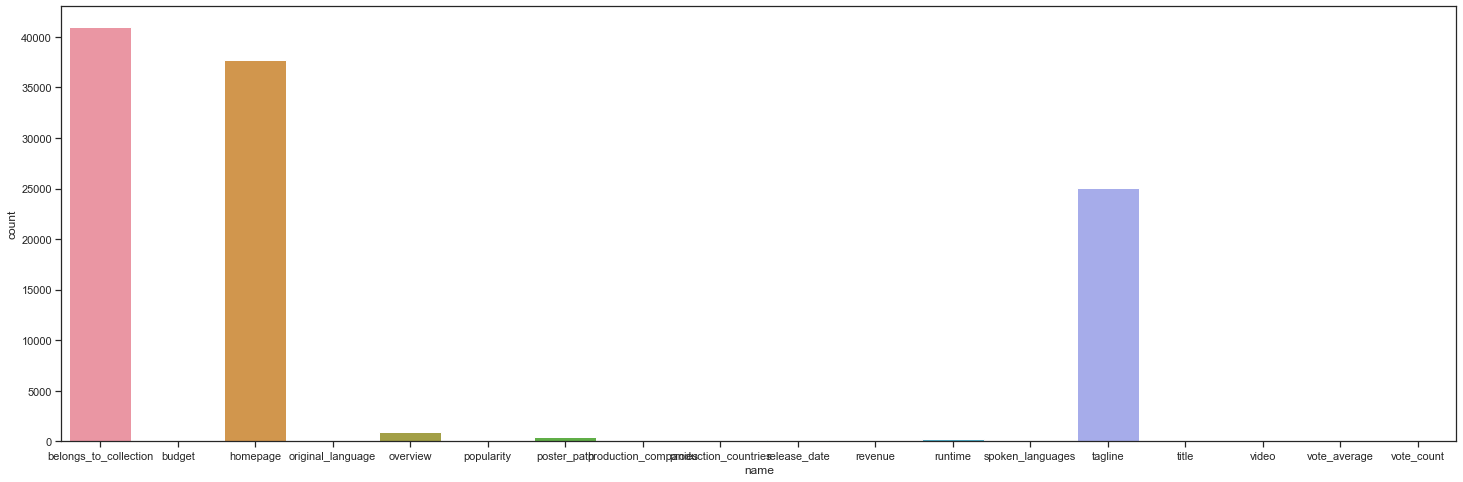

In [9]:
#Plotting a bar plot of number null objects in each column
plt.figure(figsize=(25,8))
sns.set(style='ticks')
sns.barplot(x='name', y='count', data = data_na)
plt.show()

In [10]:
#The numerical features of data. We will used the median of each and group movies based on production companies.
train.select_dtypes(include=[np.number]).columns

Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count'],
      dtype='object')

In [11]:
#First drop columns with more than 80% null values
train = train.dropna(thresh=0.80*len(train), axis=1)

In [12]:
#Check now to see which columns still have null values
train.columns[train.isnull().any()]

Index(['budget', 'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [13]:
#Now let change the null values
#Lets fill in the missing values that are strings
for col in ('original_language', 'overview','poster_path',
            'production_countries', 'release_date','spoken_languages','title','production_companies',
            'video'):
    train[col] = train[col].fillna('None')
#We set the revenue.votings and popularityy of missing movies to there median value based on their production companies
#The difference of grouping and not grouping is that the features are grouped by thei prodcution companies which will 
#give us a better average for each featurer rather than the general average
train['revenue'] = train.groupby('production_companies')['revenue'].transform(lambda x: x.fillna(x.median()))
train['vote_average'] = train.groupby('production_companies')['vote_average'].transform(lambda x: x.fillna(x.median()))
train['popularity'] = train.groupby('production_companies')['popularity'].transform(lambda x: x.fillna(x.median()))
train['vote_count'] = train.groupby('production_companies')['vote_count'].transform(lambda x: x.fillna(x.median()))
#If any empty rows left in numerical values fill them with their mean
for col in ('revenue','popularity','vote_average', 'vote_count', 'runtime', 'budget', 'popularity'):
     train[col] = train[col].fillna(train[col].mean())

In [14]:
#We have to now change all string values of data to float, as it is necessary for plotting and training models
col = ('genres','original_language', 'original_title', 'overview',
       'poster_path', 'production_companies', 'production_countries','release_date', 'spoken_languages',
       'title', 'video')
from sklearn.preprocessing import LabelEncoder
for c in col:
    lbl = LabelEncoder()
    lbl.fit(list(train[c].values))
    train[c] = lbl.transform(list(train[c].values))

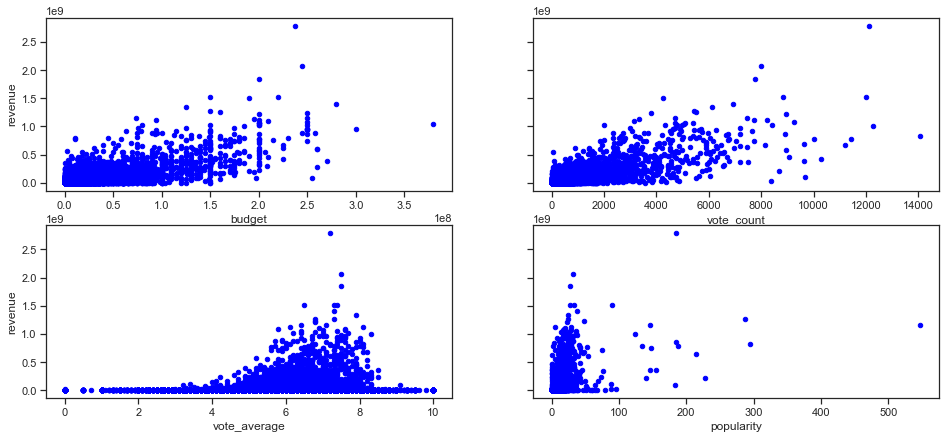

In [15]:
#Lets plot scatter plot of the tom correlative features and find their outliers.
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(16, 7))
axes = np.ravel(axes)
col_name = ['budget','vote_count','vote_average','popularity']
for i, c in zip(range(4), col_name):
    train.plot.scatter(ax=axes[i], x=c, y='revenue', sharey=True, colorbar=False, c='blue')

In [16]:
#Lets remove outliers
train = train[train['budget'] < 260000000]
train = train[train['vote_count'] < 10500]
train = train[train['vote_average'] > 0.5]
train = train[train['popularity'] < 250]

{'whiskers': [<matplotlib.lines.Line2D at 0x2b600c35c50>,
 'caps': [<matplotlib.lines.Line2D at 0x2b600c43c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b600c43128>],
 'medians': [<matplotlib.lines.Line2D at 0x2b600c43f60>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b600c4c710>],
 'means': []}

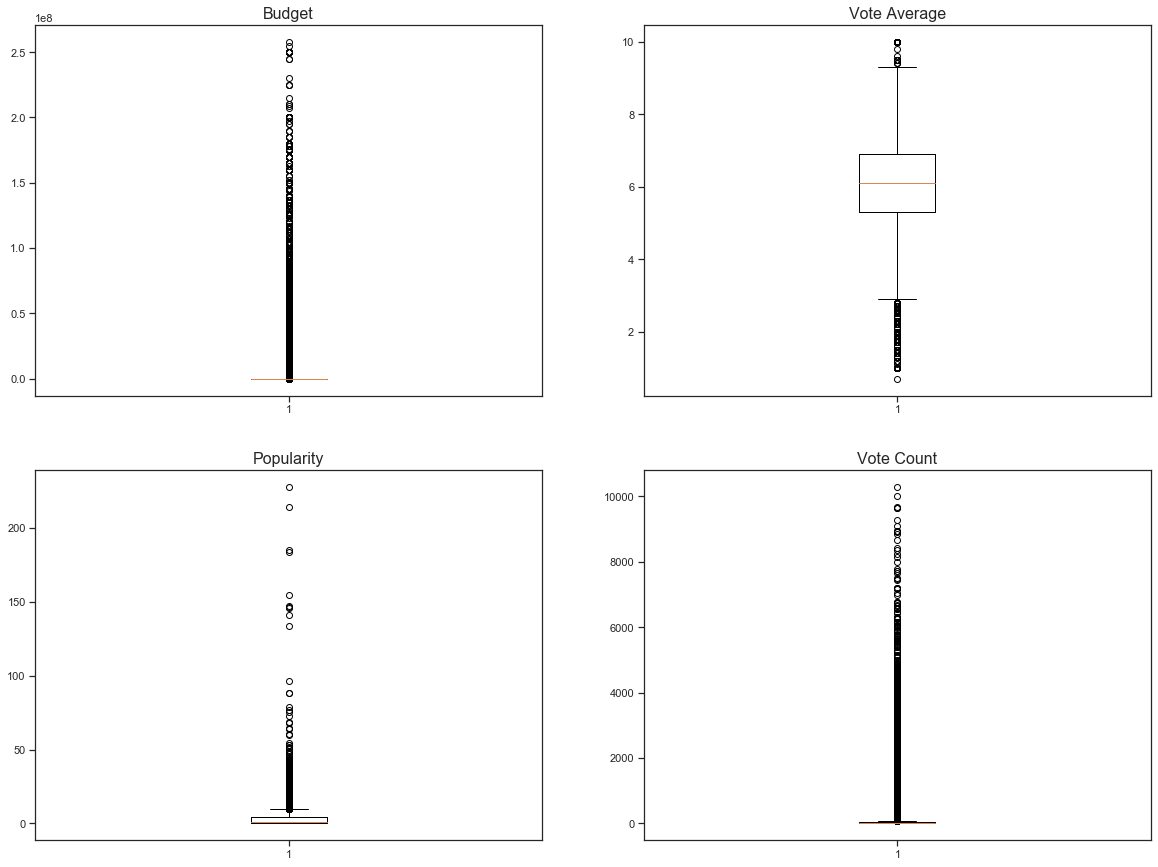

In [17]:
#Lets draw box plot's for all relative data with high correlation to the revenue after removing the outliers
fig = plt.figure(figsize=(20, 15))
sns.set(style='ticks')
fig2 = fig.add_subplot(221);
fig2.set_title('Budget', fontsize=16)
plt.boxplot(train['budget'])
fig3 = fig.add_subplot(222);
fig3.set_title('Vote Average', fontsize=16)
plt.boxplot(train['vote_average'])
fig4 = fig.add_subplot(223);
fig4.set_title('Popularity', fontsize=16)
plt.boxplot(train['popularity'])
fig5 = fig.add_subplot(224);
fig5.set_title('Vote Count', fontsize=16)
plt.boxplot(train['vote_count'])

[3 Marks]
# d

Train a regression model to predict movie revenue. Plot predicted revenue vs. actual revenue on the test set. Quantify the error in your prediction. (You may use sklearn for this step)

In [18]:
#Train sets
from sklearn.model_selection import train_test_split
y = train['revenue']
del train['revenue']
X = train.values
y=y.values
#test size is 1/3 of data or ~0.33 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 7)

In [19]:
#Get the shap of enginered data. We can see that we had a lot of redundant and null data
print(X_train.shape, y_train.shape)

(28434, 16) (28434,)


In [20]:
# Regression model here, plot your fit to the revenue data versus the actual data from the test set as a scatter plot.

##### YOUR CODE HERE #######
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
print("Accuracy of LinearRegression: ", r2_score(y_test, prediction)*100)
print("MSE of LinearRegression: ", mean_squared_error(y_test, prediction)*100)

Accuracy of LinearRegression:  74.31505312334046
MSE of LinearRegression:  1.0452466398222408e+17


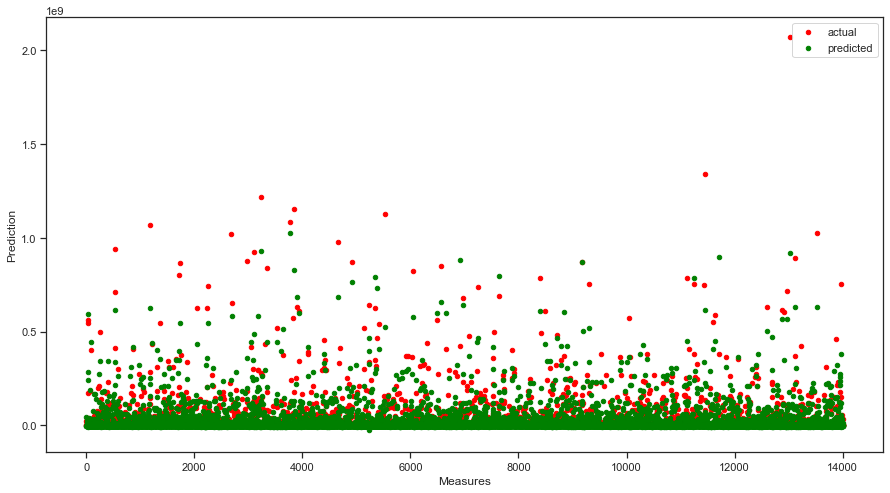

In [21]:
#Plot our model
plt.figure(figsize=(15, 8))
plt.scatter(x=range(0,y_test.size), y=y_test, color = "red", label='actual', s=20)
plt.scatter(x=range(0,prediction.size), y=prediction, color = "green", label='predicted', s=20)
plt.xlabel("Measures")
plt.ylabel("Prediction")
plt.legend()
plt.show()

A non-linear fit to the data, with and without regularization.

In [91]:
##### YOUR CODE HERE WITHOUT REGULARIZATION #######
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, LinearRegression
poly_features = PolynomialFeatures(degree=3)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
lr = LinearRegression()
lr.fit(X_train_poly,y_train)
prediction = lr.predict(X_test_poly)
print("MSE of two degree Linear Regression: ", mean_squared_error(y_test, prediction))
print("R2 score of three degree Linear Regression: ", mean_squared_error(y_test, prediction))

MSE of two degree Linear Regression:  1406463968081504.2
R2 score of three degree Linear Regression:  1406463968081504.2


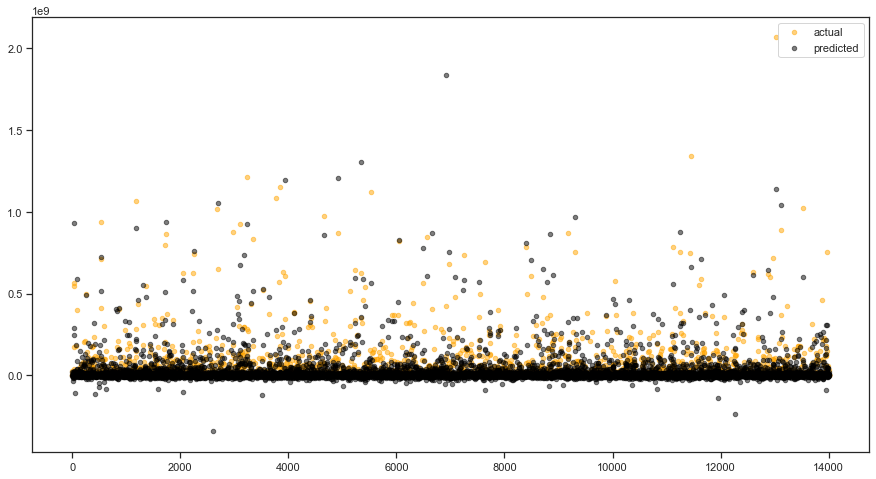

In [93]:
plt.figure(figsize=(15, 8))
plt.scatter(x=range(0,y_test.size), y=y_test, color = "orange", label='actual', s=20, alpha=0.5)
plt.scatter(x=range(0,prediction.size), y=prediction, color = "black", label='predicted', s=20, alpha=0.5)
plt.legend()

In [88]:
##### YOUR CODE HERE WITH REGULARIZATION #######
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
ridge = linear_model.Ridge(alpha = 1e9)
ridge.fit(X_train,y_train)       

Ridge(alpha=1000000000.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [97]:
prediction = ridge.predict(X_test)
print("R2 score of Ridge regression with alpha = 1e9 is: ",r2_score(prediction, y_test)*100)
print("MSE of Ridge regression with alpha = 1e9 is: ",mean_squared_error(prediction, y_test))

R2 score of Ridge regression with alpha = 1e9 is:  60.86094634363194
MSE of Ridge regression with alpha = 1e9 is:  1065185034584489.9


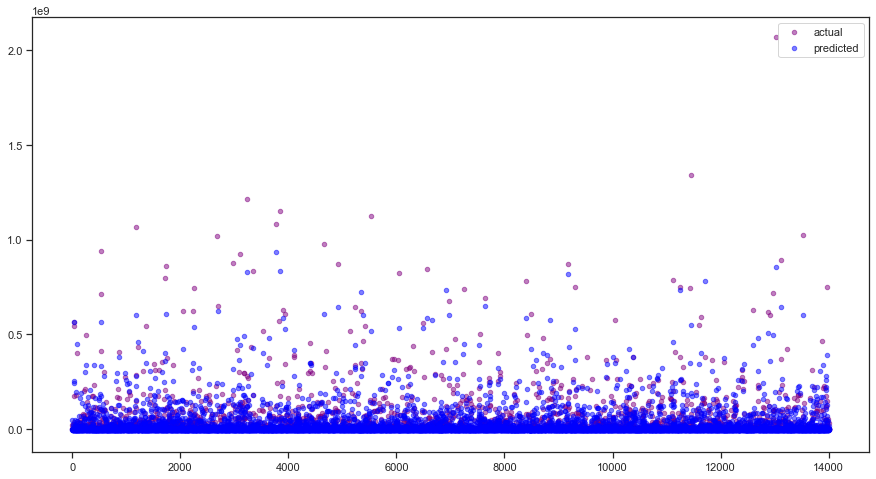

In [90]:
plt.figure(figsize=(15, 8))
plt.scatter(x=range(0,y_test.size), y=y_test, color = "purple", label='actual', s=20, alpha=0.5)
plt.scatter(x=range(0,prediction.size), y=prediction, color = "blue", label='predicted', s=20, alpha=0.5)
plt.legend()